<a href="https://colab.research.google.com/github/jojoroy/Parkinsons-model/blob/main/Copy_of_pkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://challengedata.ens.fr/participants/challenges/159/submissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
X=pd.read_csv('/content/drive/MyDrive/challenge_1/X_train_6ZIKlTY.csv')

In [3]:
X['age_at_diagnosis_imputed'] = X.groupby('patient_id')['age_at_diagnosis'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')  # If consistent in some rows
)

# If still missing (completely null per patient), use min age as a fallback
missing_mask = X['age_at_diagnosis_imputed'].isna()

X.loc[missing_mask, 'age_at_diagnosis_imputed'] = X[missing_mask].groupby('patient_id')['age'].transform('min')

<ipython-input-3-cbe5260070f4>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')  # If consistent in some rows


In [4]:
static_df = X.groupby('patient_id')[['gene']].first().reset_index()


In [5]:
static_df['gene'].fillna(static_df['gene'].mode()[0], inplace=True)
X = X.drop(columns=['gene']).merge(static_df, on='patient_id', how='left')

<ipython-input-5-d195c2163302>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  static_df['gene'].fillna(static_df['gene'].mode()[0], inplace=True)


<Axes: xlabel='gene', ylabel='age_at_diagnosis_imputed'>

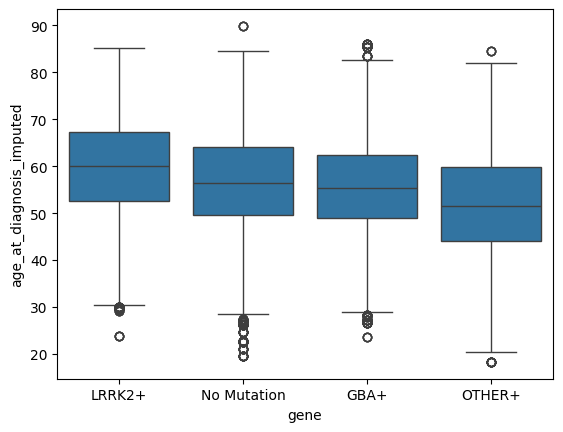

In [12]:
sns.boxplot(x=X['gene'],y=X['age_at_diagnosis_imputed'])

<Axes: xlabel='gene', ylabel='age_at_diagnosis_imputed'>

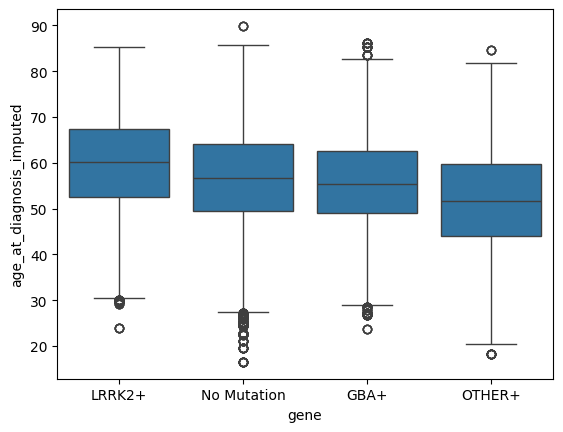

In [17]:
sns.boxplot(x=X['gene'],y=X['age_at_diagnosis_imputed'])

[]

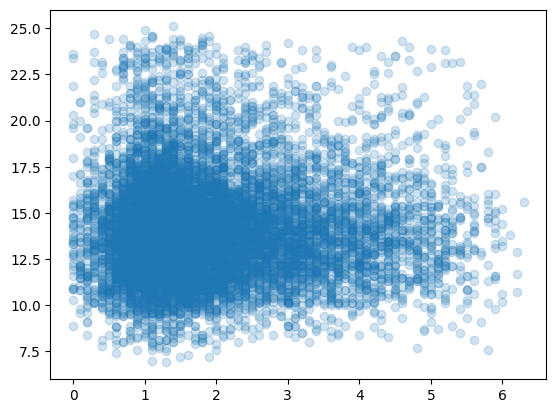

In [ ]:
# @title age_at_diagnosis


plt.scatter(X['time_since_intake_on'],X['time_since_intake_off'],alpha=0.2)
plt.plot()

[]

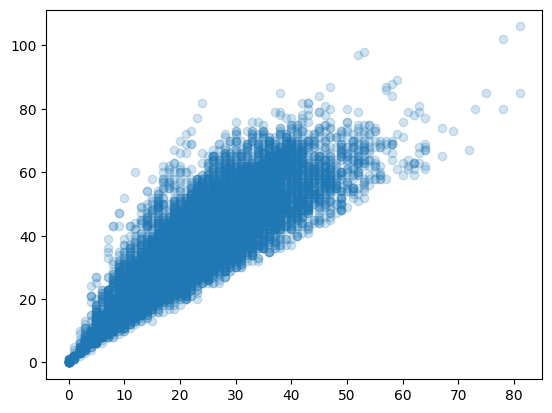

In [ ]:
plt.scatter(X['on'],X['off'],alpha=0.2)
plt.plot()

In [ ]:
X.describe()

,Index,sexM,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
count,55603.000000,55603.000000,52773.000000,55603.000000,35010.000000,29663.000000,11775.000000,38944.000000,32196.000000
mean,27801.000000,0.596353,56.734648,62.516422,638.102228,1.953717,14.199448,21.985980,26.295316
std,16051.347846,0.490633,10.823093,11.484480,219.443182,1.168793,2.844782,10.371291,16.534567
min,0.000000,0.000000,16.500000,16.500000,50.000000,0.000000,6.900000,0.000000,0.000000
25%,13900.500000,0.000000,49.500000,54.900000,481.000000,1.100000,12.200000,14.000000,13.000000
50%,27801.000000,1.000000,56.900000,62.500000,611.000000,1.600000,13.800000,21.000000,24.000000
75%,41701.500000,1.000000,64.400000,70.500000,765.000000,2.600000,15.700000,28.000000,38.000000
max,55602.000000,1.000000,89.900000,103.300000,1796.000000,6.300000,25.100000,95.000000,106.000000


In [6]:
X.isnull().sum()

,0
Index,0
patient_id,0
cohort,0
sexM,0
age_at_diagnosis,2830
age,0
ledd,20593
time_since_intake_on,25940
time_since_intake_off,43828
on,16659


In [7]:
colnames_numerics_only = X.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['Index',
 'sexM',
 'age_at_diagnosis',
 'age',
 'ledd',
 'time_since_intake_on',
 'time_since_intake_off',
 'on',
 'off',
 'age_at_diagnosis_imputed']

In [8]:
X[['sexM',
 'age_at_diagnosis',
 'age',
 'ledd',
 'time_since_intake_on',
 'time_since_intake_off',
 'on',
 'off','age_at_diagnosis_imputed']].corr(method='spearman')

,sexM,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,age_at_diagnosis_imputed
sexM,1.000000,0.013671,0.009863,-0.015332,0.002814,-0.002810,0.023194,-0.003978,0.015399
age_at_diagnosis,0.013671,1.000000,0.937149,-0.164366,-0.007134,0.010847,0.051733,0.113320,1.000000
age,0.009863,0.937149,1.000000,0.059116,-0.006324,0.016309,0.130453,0.237349,0.937371
ledd,-0.015332,-0.164366,0.059116,1.000000,-0.001862,0.021345,0.206027,0.218431,-0.160541
time_since_intake_on,0.002814,-0.007134,-0.006324,-0.001862,1.000000,0.007263,-0.244950,-0.004217,-0.006797
time_since_intake_off,-0.002810,0.010847,0.016309,0.021345,0.007263,1.000000,0.000624,0.039174,0.009555
on,0.023194,0.051733,0.130453,0.206027,-0.244950,0.000624,1.000000,0.885680,0.054669
off,-0.003978,0.113320,0.237349,0.218431,-0.004217,0.039174,0.885680,1.000000,0.113360
age_at_diagnosis_imputed,0.015399,1.000000,0.937371,-0.160541,-0.006797,0.009555,0.054669,0.113360,1.000000


In [19]:
import numpy as np
from scipy.stats import rankdata, norm


def xicor(x, y, ties="auto"):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    print(x,y)
    n = len(y)

    if len(x) != n:
        raise IndexError(
            f"x, y length mismatch: {len(x)}, {len(y)}"
        )

    if ties == "auto":
        ties = len(np.unique(y)) < n
    elif not isinstance(ties, bool):
        raise ValueError(
            f"expected ties either \"auto\" or boolean, "
            f"got {ties} ({type(ties)}) instead"
        )

    y = y[np.argsort(x)]
    r = rankdata(y, method="ordinal")
    nominator = np.sum(np.abs(np.diff(r)))

    if ties:
        l = rankdata(y, method="max")
        denominator = 2 * np.sum(l * (n - l))
        nominator *= n
    else:
        denominator = np.power(n, 2) - 1
        nominator *= 3

    statistic = 1 - nominator / denominator  # upper bound is (n - 2) / (n + 1)
    p_value = norm.sf(statistic, scale=2 / 5 / np.sqrt(n))

    return statistic, p_value

In [ ]:
x2=X.dropna(subset=['ledd','on'])

In [ ]:
xicor(x2['ledd'],x2['on'])

[607. 666. 717. ... 853. 928. 970.] [ 7. 12.  6. ... 38. 23. 26.]


(np.float64(0.04298837974506786), np.float64(3.0872025645386477e-90))

In [ ]:
x1=X.dropna(subset=['gene','age_at_diagnosis','time_since_intake_on'])

In [ ]:
x1

,Index,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
0,0,IPLP5212,A,0,LRRK2+,48.5,52.1,607.0,1.9,NaN,7.0,NaN
1,1,IPLP5212,A,0,LRRK2+,48.5,53.0,666.0,1.9,17.6,12.0,44.0
2,2,IPLP5212,A,0,LRRK2+,48.5,53.9,717.0,1.2,NaN,6.0,NaN
3,3,IPLP5212,A,0,LRRK2+,48.5,54.8,770.0,1.5,NaN,11.0,NaN
4,4,IPLP5212,A,0,LRRK2+,48.5,56.9,885.0,0.3,NaN,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55592,55592,IIUR9984,A,0,No Mutation,49.0,57.6,NaN,1.3,NaN,30.0,NaN
55593,55593,IIUR9984,A,0,No Mutation,49.0,58.5,764.0,2.7,NaN,21.0,NaN
55594,55594,IIUR9984,A,0,No Mutation,49.0,59.9,853.0,0.8,17.3,38.0,53.0
55595,55595,IIUR9984,A,0,No Mutation,49.0,61.3,928.0,2.3,18.0,23.0,58.0


In [16]:
X['gene'].unique()

array(['LRRK2+', 'No Mutation', 'GBA+', 'OTHER+'], dtype=object)

In [11]:
null_rows = X.loc[X['age_at_diagnosis'].isnull() ]

print(null_rows)

       Index patient_id cohort  sexM    gene  age_at_diagnosis   age   ledd  \
245      245   ZXHK0345      A     0  LRRK2+               NaN  51.5    NaN   
246      246   ZXHK0345      A     0  LRRK2+               NaN  52.8    NaN   
247      247   ZXHK0345      A     0  LRRK2+               NaN  55.5  528.0   
248      248   ZXHK0345      A     0  LRRK2+               NaN  56.4    NaN   
249      249   ZXHK0345      A     0  LRRK2+               NaN  57.2  629.0   
...      ...        ...    ...   ...     ...               ...   ...    ...   
55543  55543   SMRA1821      A     1     NaN               NaN  60.0    NaN   
55544  55544   SMRA1821      A     1     NaN               NaN  61.6    NaN   
55545  55545   SMRA1821      A     1     NaN               NaN  62.2    NaN   
55546  55546   SMRA1821      A     1     NaN               NaN  63.0    NaN   
55547  55547   SMRA1821      A     1     NaN               NaN  63.6    NaN   

       time_since_intake_on  time_since_intake_off 

## y

In [9]:
y=pd.read_csv('/content/drive/MyDrive/challenge_1/y_train_lXj6X5y.csv',index_col='Index')

In [10]:
y.describe()

,target
count,55603.000000
mean,37.331606
std,16.504326
min,0.000000
25%,25.400000
50%,37.100000
75%,49.200000
max,109.500000


## bias

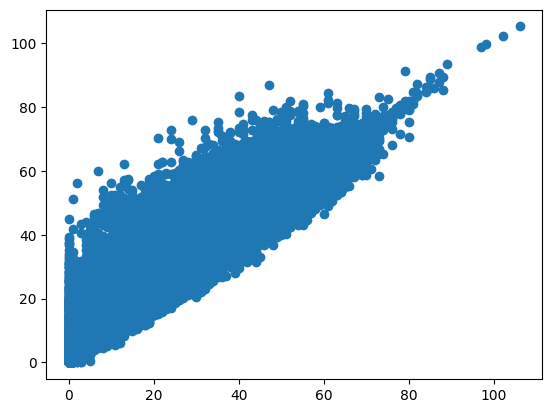

In [ ]:
plt.scatter(X['off'],y)

In [12]:
x1f=pd.merge(X,y,left_index=True,right_index=True)

In [14]:
x1f

,Index,patient_id,cohort,sexM,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,age_at_diagnosis_imputed,gene,target
0,0,IPLP5212,A,0,48.5,52.1,607.0,1.9,NaN,7.0,NaN,48.5,LRRK2+,34.7
1,1,IPLP5212,A,0,48.5,53.0,666.0,1.9,17.6,12.0,44.0,48.5,LRRK2+,38.1
2,2,IPLP5212,A,0,48.5,53.9,717.0,1.2,NaN,6.0,NaN,48.5,LRRK2+,41.6
3,3,IPLP5212,A,0,48.5,54.8,770.0,1.5,NaN,11.0,NaN,48.5,LRRK2+,44.9
4,4,IPLP5212,A,0,48.5,56.9,885.0,0.3,NaN,24.0,NaN,48.5,LRRK2+,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55598,55598,CZTX7061,A,1,59.0,60.6,NaN,NaN,NaN,NaN,1.0,59.0,LRRK2+,2.9
55599,55599,CZTX7061,A,1,59.0,61.1,NaN,NaN,NaN,NaN,4.0,59.0,LRRK2+,3.4
55600,55600,CZTX7061,A,1,59.0,61.8,NaN,NaN,NaN,NaN,0.0,59.0,LRRK2+,4.3
55601,55601,CZTX7061,A,1,59.0,62.6,NaN,NaN,NaN,NaN,2.0,59.0,LRRK2+,5.3


In [15]:
x1f['diff']=x1f['target']-x1f['off']


In [ ]:
x1f['bias'].sum()

np.int64(11350)

In [16]:
colnames_numerics_only = x1f.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['Index',
 'sexM',
 'age_at_diagnosis',
 'age',
 'ledd',
 'time_since_intake_on',
 'time_since_intake_off',
 'on',
 'off',
 'age_at_diagnosis_imputed',
 'target',
 'diff']

In [18]:
x1f[['sexM',
 'age_at_diagnosis',
 'age',
 'ledd',
 'time_since_intake_on',
 'time_since_intake_off',
 'on',
 'off','age_at_diagnosis_imputed',
   'target',
 'diff']].corr(method='spearman')

,sexM,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,age_at_diagnosis_imputed,target,diff
sexM,1.000000,0.013671,0.009863,-0.015332,0.002814,-0.002810,0.023194,-0.003978,0.015399,-0.001686,-0.002390
age_at_diagnosis,0.013671,1.000000,0.937149,-0.164366,-0.007134,0.010847,0.051733,0.113320,1.000000,0.117280,0.026503
age,0.009863,0.937149,1.000000,0.059116,-0.006324,0.016309,0.130453,0.237349,0.937371,0.290535,0.095672
ledd,-0.015332,-0.164366,0.059116,1.000000,-0.001862,0.021345,0.206027,0.218431,-0.160541,0.279299,0.048594
time_since_intake_on,0.002814,-0.007134,-0.006324,-0.001862,1.000000,0.007263,-0.244950,-0.004217,-0.006797,0.001293,-0.000941
time_since_intake_off,-0.002810,0.010847,0.016309,0.021345,0.007263,1.000000,0.000624,0.039174,0.009555,0.014446,-0.055406
on,0.023194,0.051733,0.130453,0.206027,-0.244950,0.000624,1.000000,0.885680,0.054669,0.686916,-0.445119
off,-0.003978,0.113320,0.237349,0.218431,-0.004217,0.039174,0.885680,1.000000,0.113360,0.880910,-0.190304
age_at_diagnosis_imputed,0.015399,1.000000,0.937371,-0.160541,-0.006797,0.009555,0.054669,0.113360,1.000000,0.121028,0.029935
target,-0.001686,0.117280,0.290535,0.279299,0.001293,0.014446,0.686916,0.880910,0.121028,1.000000,0.248453


In [32]:
x2=x1f.dropna(subset=['diff','ledd'])

In [34]:
xicor(x2['ledd'],x2['diff'])

[666. 888. 984. ... 853. 928. 970.] [-5.9 24.1 19.9 ... 14.3 10.7  8.1]


(np.float64(0.0058997449932236545), np.float64(0.054744658731383636))

<Axes: xlabel='age', ylabel='ledd'>

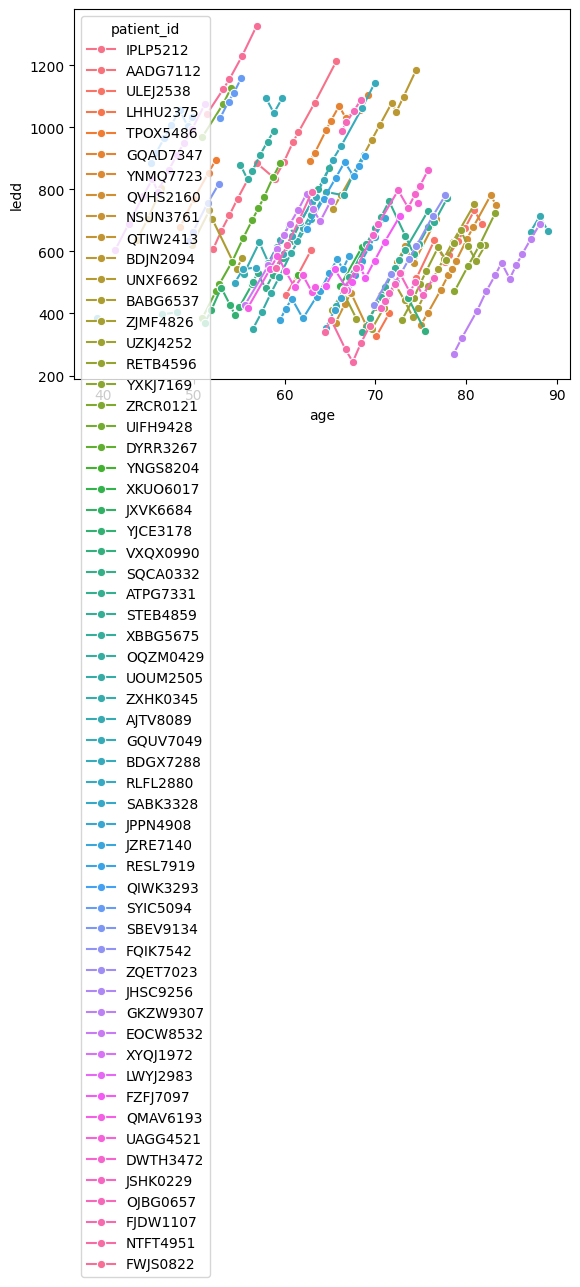

In [40]:
sns.lineplot(x='age', y='ledd', hue='patient_id', data=x1f.iloc[0:500,], marker='o')


In [41]:
missing_per_patient =X.groupby('patient_id')['ledd'].apply(lambda x: x.isna().sum())


<Axes: >

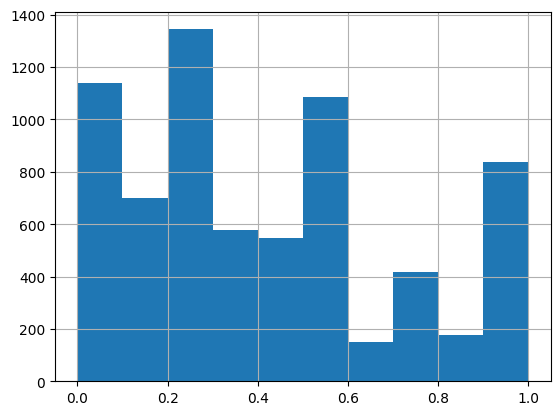

In [51]:
(missing_per_patient/X.groupby('patient_id')['ledd'].size()).hist()

<Axes: >

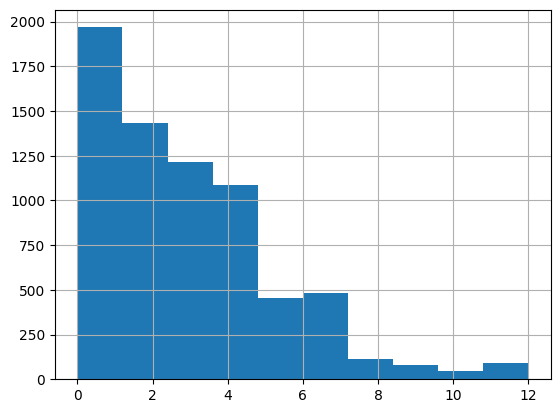

In [43]:
missing_per_patient.hist()


In [55]:
# Function to interpolate per patient, only if at least one non-NaN
def interpolate_if_possible(group):
    if group['ledd'].notna().any():
        group['ledd'] = group['ledd'].interpolate(method='linear',limit_direction='both')
    return group

# Apply interpolation per patient
df_interpolated = X.groupby('patient_id').apply(interpolate_if_possible).reset_index(drop=True)

# Result
print(df_interpolated)

       Index patient_id cohort  sexM  age_at_diagnosis   age   ledd  \
0         12   AADG7112      B     1              57.7  58.7  460.0   
1         13   AADG7112      B     1              57.7  60.1  460.0   
2         14   AADG7112      B     1              57.7  61.4  522.0   
3         15   AADG7112      B     1              57.7  62.9  604.0   
4      55261   AAJS7617      A     0              55.0  56.5    NaN   
...      ...        ...    ...   ...               ...   ...    ...   
55598  10481   ZZPU4420      B     1              58.0  64.4  730.0   
55599  44885   ZZTP1426      A     1              42.1  42.2    NaN   
55600  44886   ZZTP1426      A     1              42.1  43.6    NaN   
55601  44887   ZZTP1426      A     1              42.1  44.0    NaN   
55602  44888   ZZTP1426      A     1              42.1  44.8    NaN   

       time_since_intake_on  time_since_intake_off    on   off  \
0                       NaN                    NaN   NaN  18.0   
1              

<ipython-input-55-34d05b57c34c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_interpolated = X.groupby('patient_id').apply(interpolate_if_possible).reset_index(drop=True)


In [56]:
df_interpolated.isna().sum()

,0
Index,0
patient_id,0
cohort,0
sexM,0
age_at_diagnosis,2830
age,0
ledd,4369
time_since_intake_on,25940
time_since_intake_off,43828
on,16659
